In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
df=pd.read_csv("FuelConsumption.csv")

--2021-04-03 19:57:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  187K 0s
    50K .......... ..........                                 100% 2.19M=0.3s

2021-04-03 19:57:06 (256 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [56]:
cdf=df[["ENGINESIZE","CO2EMISSIONS"]]
train=cdf[0:800]
test=cdf[800:cdf.shape[0]+1]
train_x=train[["ENGINESIZE"]]
train_y=train[["CO2EMISSIONS"]]
test_x=test[["ENGINESIZE"]]
test_y=test[["CO2EMISSIONS"]]

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly


array([[1.  , 2.  , 4.  ],
       [1.  , 2.4 , 5.76],
       [1.  , 1.5 , 2.25],
       ...,
       [1.  , 1.6 , 2.56],
       [1.  , 1.6 , 2.56],
       [1.  , 1.6 , 2.56]])

[[ 0.         46.64954124 -1.04120298]]
[114.34657821]


Text(0, 0.5, 'Emission')

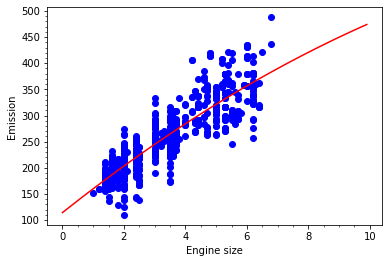

In [58]:
train_y_=regr.fit(train_x_poly, train_y)
print(regr.coef_)
print(regr.intercept_)
# plt.plot(train_x,regr.intercept_[0]+train_x_poly[0]*regr.coef_[0][1]+train_x_poly*regr.coef_[0][1])
plt.scatter(train_x,train_y,color="b")
# plt.plot(train_x,regr.intercept_[0]+(train_x_poly)*regr.coef_[0][1]+np.power(train_x_poly,2)*regr.coef_[0][2],color="m")
plt.minorticks_on()
arr1=np.arange(0.0,10.0,0.1)
arr2=arr1*regr.coef_[0][1]+np.power(arr1,2)*regr.coef_[0][2]+regr.intercept_
plt.plot(arr1,arr2,color="red")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [62]:
from sklearn.metrics import r2_score
test_x_poly=poly.fit_transform(test_x)
test_y_=regr.predict(test_x_poly)
print("MAE %0.2f" %np.mean(np.absolute(test_y-test_y_)))
print("MSE %0.2F" %np.mean((test_y-test_y_)**2))
print("r2 score is %0.2f" %r2_score(test_y,test_y_))

MAE 19.75
MSE 706.17
r2 score is 0.79
